# TODOS

* Numeric data (temperature, snow, wind, distance):
    * Convert to same unit - convert to US units
    * Impute missing values
    * Standardize/normalize
* For categorical data:
    * Encode appropriately
    * Composites -> if no 4 then take average and treat as new category, 4 trumps all
* Age of circles - older circles are more numerous
* Any outliers for these

## Goal after cleaning

Predict how many people will show up.

### See data dictionary: 

http://www.audubon.org/sites/default/files/documents/cbc_report_field_definitions_2013.pdf

In [1]:
# !pip install units  # or install with conda - just run once if installing from jupyter notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from units import unit

In [3]:
raw_data = pd.read_csv("cbc_effort_weather_1900-2018.csv", encoding = "ISO-8859-1")

In [4]:
raw_data.head()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow
0,Scotch Lake,CA-NB,45.950000,-66.983300,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto,CA-ON,43.700000,-79.416700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,1900-12-25,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_data.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow
106924,Sundance,US-WY,44.208072,-104.227101,2018,2017-12-30,4.0,12.0,3.0,3.0,...,1.0,1.0,4.0,2.0,6.0,6.0,3,3,3,3
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,2017-12-30,2.0,NaN,NaN,2.0,...,3.0,NaN,NaN,NaN,5.0,6.0,3,3,3,3
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,2017-12-17,17.0,NaN,NaN,7.0,...,1.0,NaN,NaN,NaN,6.0,2.0,3,1,"3,1",3
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,2017-12-17,19.0,NaN,NaN,10.0,...,1.0,NaN,NaN,NaN,6.0,2.0,3,1,NaN,NaN
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,2017-12-23,24.0,NaN,16.0,16.0,...,1.0,NaN,NaN,NaN,1.0,1.0,3,3,NaN,NaN


In [6]:
len(raw_data)

106929

Drop the test sites.

In [7]:
raw_data = raw_data.drop(raw_data[raw_data["circle_name"].str.contains("do not")].index)

In [8]:
raw_data.shape

(106925, 31)

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106925 entries, 0 to 106928
Data columns (total 31 columns):
circle_name           106925 non-null object
country_state         106925 non-null object
lat                   106925 non-null float64
lon                   106925 non-null float64
count_year            106925 non-null int64
count_date            106925 non-null object
n_field_counters      106707 non-null float64
n_feeder_counters     50575 non-null float64
min_field_parties     56210 non-null float64
max_field_parties     57093 non-null float64
field_hours           97024 non-null float64
feeder_hours          61910 non-null float64
nocturnal_hours       58526 non-null float64
field_distance        98802 non-null float64
nocturnal_distance    53193 non-null float64
distance_units        106597 non-null object
min_temp              82436 non-null float64
max_temp              82420 non-null float64
temp_unit             57026 non-null float64
min_wind              80027 non-

In [10]:
raw_data.describe(include = 'all')

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,wind_unit,min_snow,max_snow,snow_unit,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow
count,106925,106925,106925.000000,106925.000000,106925.000000,106925,106707.000000,50575.000000,56210.000000,57093.000000,...,57026.000000,76936.000000,77165.000000,53379.000000,82396.000000,82268.000000,81682,81582,81484,81410
unique,4821,199,NaN,NaN,NaN,1762,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13,14,13,13
top,Springfield,US-CA,NaN,NaN,NaN,2017-12-16,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,3
freq,258,5869,NaN,NaN,NaN,669,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,43250,44083,44380,44891
mean,NaN,NaN,39.988133,-91.624462,1987.639149,NaN,20.836352,4.657242,8.273261,9.941009,...,1.180900,2.024964,4.493643,2.207160,2.978021,3.243084,NaN,NaN,NaN,NaN
std,NaN,NaN,7.594241,19.897468,24.865097,NaN,21.376734,15.635358,7.591907,9.100070,...,0.638249,5.576817,11.105600,0.609436,2.016466,2.136045,NaN,NaN,NaN,NaN
min,NaN,NaN,-77.461409,-177.380631,1901.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,36.500018,-102.483303,1975.000000,NaN,8.000000,0.000000,4.000000,5.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,40.816675,-88.024596,1993.000000,NaN,15.000000,1.000000,6.000000,8.000000,...,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,44.076819,-78.550000,2007.000000,NaN,27.000000,5.000000,10.000000,12.000000,...,1.000000,2.000000,5.000000,2.000000,5.000000,6.000000,NaN,NaN,NaN,NaN


In [11]:
raw_data.isnull().sum()

circle_name               0
country_state             0
lat                       0
lon                       0
count_year                0
count_date                0
n_field_counters        218
n_feeder_counters     56350
min_field_parties     50715
max_field_parties     49832
field_hours            9901
feeder_hours          45015
nocturnal_hours       48399
field_distance         8123
nocturnal_distance    53732
distance_units          328
min_temp              24489
max_temp              24505
temp_unit             49899
min_wind              26898
max_wind              26816
wind_unit             49899
min_snow              29989
max_snow              29760
snow_unit             53546
am_cloud              24529
pm_cloud              24657
am_rain               25243
pm_rain               25343
am_snow               25441
pm_snow               25515
dtype: int64

In [12]:
#What percentage are null
pd.DataFrame((raw_data.isnull().sum())/len(raw_data) * 100).sort_values(by = 0, ascending = False)

,0
n_feeder_counters,52.700491
nocturnal_distance,50.252046
snow_unit,50.078092
min_field_parties,47.430442
wind_unit,46.667290
temp_unit,46.667290
max_field_parties,46.604629
nocturnal_hours,45.264438
feeder_hours,42.099603
min_snow,28.046762


In [13]:
#What type are the different variables
raw_data.dtypes.sort_values()

count_year              int64
nocturnal_hours       float64
max_snow              float64
min_snow              float64
wind_unit             float64
max_wind              float64
min_wind              float64
temp_unit             float64
max_temp              float64
min_temp              float64
pm_cloud              float64
nocturnal_distance    float64
field_distance        float64
am_cloud              float64
feeder_hours          float64
field_hours           float64
max_field_parties     float64
min_field_parties     float64
n_feeder_counters     float64
n_field_counters      float64
lon                   float64
lat                   float64
snow_unit             float64
am_rain                object
pm_rain                object
circle_name            object
distance_units         object
count_date             object
country_state          object
am_snow                object
pm_snow                object
dtype: object

__N Field Counters__

In [14]:
raw_data['n_field_counters'].describe()

count    106707.000000
mean         20.836352
std          21.376734
min           0.000000
25%           8.000000
50%          15.000000
75%          27.000000
max         501.000000
Name: n_field_counters, dtype: float64

In [15]:
(raw_data['n_field_counters'].isnull().sum()) / len(raw_data) * 100

0.2038812251578209

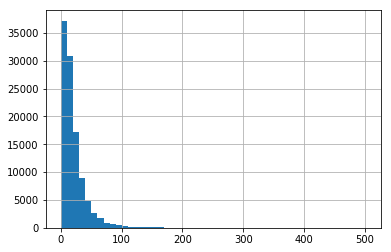

In [16]:
raw_data['n_field_counters'].hist(bins = 50);

In [17]:
raw_data.loc[raw_data['n_field_counters'] < 100].shape[0] / len(raw_data)

0.9857096095393968

__Count Year__

In [18]:
raw_data['count_year'].describe()

count    106925.000000
mean       1987.639149
std          24.865097
min        1901.000000
25%        1975.000000
50%        1993.000000
75%        2007.000000
max        2018.000000
Name: count_year, dtype: float64

In [19]:
(raw_data['count_year'].isnull().sum())/len(raw_data) * 100

0.0

In [20]:
raw_data.min()

circle_name           (Horton) Four Rivers
country_state                          AQ-
lat                               -77.4614
lon                               -177.381
count_year                            1901
count_date                      1900-12-25
n_field_counters                         0
n_feeder_counters                        0
min_field_parties                        0
max_field_parties                        0
field_hours                              0
feeder_hours                           -56
nocturnal_hours                          0
field_distance                           0
nocturnal_distance                       0
min_temp                              -340
max_temp                              -200
temp_unit                                1
min_wind                               -16
max_wind                                 0
wind_unit                                0
min_snow                                 0
max_snow                                 0
snow_unit  

In [21]:
raw_data.max()

circle_name           Îles-de-la-Madeleine
country_state                        us-wi
lat                                74.7167
lon                                179.285
count_year                            2018
count_date                      2018-01-05
n_field_counters                       501
n_feeder_counters                      968
min_field_parties                      150
max_field_parties                      322
field_hours                           4407
feeder_hours                          6105
nocturnal_hours                       1105
field_distance                       61087
nocturnal_distance                   33080
min_temp                             24996
max_temp                             28909
temp_unit                                2
min_wind                                99
max_wind                               500
wind_unit                                3
min_snow                               600
max_snow                               900
snow_unit  

# Make a new dataframe named df that we will use to start adding column.

In [22]:
df = raw_data

# Conversions
Will make two columns.

One for metric (SI) and one for imperial.

## Convert distances to US miles
key = distance_units

miles = 1
inches = 2
kilometers = 3
centimeters = 4

In [23]:
distance_cols = ['field_distance', 'nocturnal_distance']

In [24]:
df.distance_units.value_counts()

Miles         99863
Kilometers     6734
Name: distance_units, dtype: int64

In [25]:
df['field_distance_imperial'] = np.where(df['distance_units']=='Miles', df['field_distance'], (df['field_distance'] / .6214))
df['field_distance_metric'] = np.where(df['distance_units']=='Kilometers', df['field_distance'], (df['field_distance'] * .6214))
df['nocturnal_distance_imperial'] = np.where(df['distance_units']=='Miles', df['nocturnal_distance'], (df['nocturnal_distance'] / .6214))
df['nocturnal_distance_metric'] = np.where(df['distance_units']=='Kilometers', df['nocturnal_distance'], (df['nocturnal_distance'] * .6214))

In [26]:
df.head()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric
0,Scotch Lake,CA-NB,45.950000,-66.983300,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto,CA-ON,43.700000,-79.416700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,1900-12-25,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,am_cloud,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric
106924,Sundance,US-WY,44.208072,-104.227101,2018,2017-12-30,4.0,12.0,3.0,3.0,...,6.0,6.0,3,3,3,3,233.7,145.22118,NaN,NaN
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,2017-12-30,2.0,NaN,NaN,2.0,...,5.0,6.0,3,3,3,3,21.0,13.04940,NaN,NaN
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,2017-12-17,17.0,NaN,NaN,7.0,...,6.0,2.0,3,1,"3,1",3,237.0,147.27180,NaN,NaN
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,2017-12-17,19.0,NaN,NaN,10.0,...,6.0,2.0,3,1,NaN,NaN,225.6,140.18784,NaN,NaN
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,2017-12-23,24.0,NaN,16.0,16.0,...,1.0,1.0,3,3,NaN,NaN,18.0,11.18520,NaN,NaN


In [28]:
df.nocturnal_distance_imperial.value_counts().head()

0.0     20025
1.0      2481
2.0      1717
10.0     1550
5.0      1465
Name: nocturnal_distance_imperial, dtype: int64

In [29]:
df.field_distance_imperial.value_counts().head()

80.0     307
40.0     287
120.0    282
90.0     281
60.0     280
Name: field_distance_imperial, dtype: int64

In [30]:
df.field_distance_metric.value_counts().head()

49.712    307
24.856    287
74.568    282
55.926    281
37.284    280
Name: field_distance_metric, dtype: int64

In [31]:
df.nocturnal_distance_metric.value_counts().head()

0.0000    20025
0.6214     2488
1.2428     1718
6.2140     1550
3.1070     1467
Name: nocturnal_distance_metric, dtype: int64

## Convert snow
key = snow_unit

2 = inches

4 = centimeters

In [32]:
snow_cols = ['min_snow', 'max_snow']

In [33]:
df.snow_unit.value_counts()

2.0    47850
4.0     5529
Name: snow_unit, dtype: int64

In [34]:
df['min_snow_imperial'] = np.where(df['snow_unit']==2, df['min_snow'], (df['min_snow'] / 2.54))
df.head()                                            

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial
0,Scotch Lake,CA-NB,45.950000,-66.983300,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto,CA-ON,43.700000,-79.416700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,1900-12-25,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,pm_cloud,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial
106924,Sundance,US-WY,44.208072,-104.227101,2018,2017-12-30,4.0,12.0,3.0,3.0,...,6.0,3,3,3,3,233.7,145.22118,NaN,NaN,1.0
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,2017-12-30,2.0,NaN,NaN,2.0,...,6.0,3,3,3,3,21.0,13.04940,NaN,NaN,NaN
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,2017-12-17,17.0,NaN,NaN,7.0,...,2.0,3,1,"3,1",3,237.0,147.27180,NaN,NaN,NaN
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,2017-12-17,19.0,NaN,NaN,10.0,...,2.0,3,1,NaN,NaN,225.6,140.18784,NaN,NaN,NaN
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,2017-12-23,24.0,NaN,16.0,16.0,...,1.0,3,3,NaN,NaN,18.0,11.18520,NaN,NaN,NaN


In [36]:
df['min_snow_metric'] = np.where(df['snow_unit']==4, df['min_snow'], (df['min_snow'] * 2.54))   

In [37]:
df.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,am_rain,pm_rain,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric
106924,Sundance,US-WY,44.208072,-104.227101,2018,2017-12-30,4.0,12.0,3.0,3.0,...,3,3,3,3,233.7,145.22118,NaN,NaN,1.0,2.54
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,2017-12-30,2.0,NaN,NaN,2.0,...,3,3,3,3,21.0,13.04940,NaN,NaN,NaN,NaN
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,2017-12-17,17.0,NaN,NaN,7.0,...,3,1,"3,1",3,237.0,147.27180,NaN,NaN,NaN,NaN
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,2017-12-17,19.0,NaN,NaN,10.0,...,3,1,NaN,NaN,225.6,140.18784,NaN,NaN,NaN,NaN
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,2017-12-23,24.0,NaN,16.0,16.0,...,3,3,NaN,NaN,18.0,11.18520,NaN,NaN,NaN,NaN


In [38]:
df['min_snow_metric'].value_counts().sort_values(ascending=False).head()

0.00     52481
2.54      3985
5.08      3556
10.16     2431
15.24     2338
Name: min_snow_metric, dtype: int64

In [39]:
df['min_snow_imperial'].value_counts().sort_values(ascending=False).head()

0.000000    52481
1.000000     2460
2.000000     2184
0.393701     1802
0.787402     1706
Name: min_snow_imperial, dtype: int64

In [40]:
df['max_snow_metric'] = np.where(df['snow_unit']==4, df['max_snow'], (df['max_snow'] * 2.54))   

In [41]:
df['max_snow_imperial'] = np.where(df['snow_unit']==2, df['max_snow'], (df['max_snow'] / 2.54))

In [42]:
df.loc[:, ['max_snow_imperial', 'max_snow_metric']].describe()

,max_snow_imperial,max_snow_metric
count,77165.000000,77165.000000
mean,3.066281,9.880511
std,8.405430,23.869954
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,3.543307,12.700000
max,900.000000,2286.000000


In [43]:
df.max_snow_imperial.value_counts().sort_values(ascending=False).head()

0.0    41984
2.0     2279
1.0     2102
6.0     2057
3.0     1888
Name: max_snow_imperial, dtype: int64

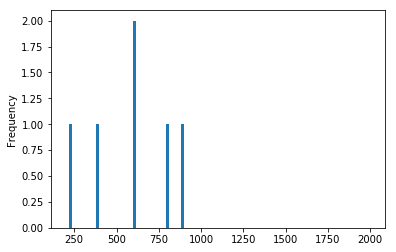

In [44]:
df.max_snow_imperial.plot(kind='hist', bins = 100, range=[200, 2000])

## Convert temperatures to Celsius
key = temp_unit

1 = celsius

2 = farenheit

In [45]:
temp_cols = ['min_temp', 'max_temp']

In [46]:
df.head()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,am_snow,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial
0,Scotch Lake,CA-NB,45.950000,-66.983300,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto,CA-ON,43.700000,-79.416700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,1900-12-25,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df['min_temp_imperial'] = np.where(df['temp_unit']==2, df['min_temp'], (df['min_temp']+32)*9/5)
df.head()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,pm_snow,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,min_temp_imperial
0,Scotch Lake,CA-NB,45.950000,-66.983300,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Toronto,CA-ON,43.700000,-79.416700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pacific Grove,US-CA,36.616700,-121.916700,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pueblo,US-CO,38.175251,-104.519575,1901,1900-12-25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bristol,US-CT,41.671800,-72.949500,1901,1900-12-25,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df['max_temp_imperial'] = np.where(df['temp_unit']==2, df['max_temp'], (df['max_temp']+32)*9/5)

In [49]:
df.tail()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,field_distance_imperial,field_distance_metric,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,min_temp_imperial,max_temp_imperial
106924,Sundance,US-WY,44.208072,-104.227101,2018,2017-12-30,4.0,12.0,3.0,3.0,...,233.7,145.22118,NaN,NaN,1.0,2.54,10.16,4.0,5.0,25.0
106925,"Tortola, British V.I.",VG-,18.350191,-64.616712,2018,2017-12-30,2.0,NaN,NaN,2.0,...,21.0,13.04940,NaN,NaN,NaN,NaN,NaN,NaN,77.0,84.0
106926,"East End, St. Croix, USVI",VI-,17.757222,-64.560191,2018,2017-12-17,17.0,NaN,NaN,7.0,...,237.0,147.27180,NaN,NaN,NaN,NaN,NaN,NaN,78.0,85.0
106927,"St. Croix, USVI",VI-,17.716794,-64.783308,2018,2017-12-17,19.0,NaN,NaN,10.0,...,225.6,140.18784,NaN,NaN,NaN,NaN,NaN,NaN,78.0,85.0
106928,"St. John, USVI",VI-,18.350191,-64.700021,2018,2017-12-23,24.0,NaN,16.0,16.0,...,18.0,11.18520,NaN,NaN,NaN,NaN,NaN,NaN,73.0,85.0


In [50]:
df['min_temp_metric'] = np.where(df['temp_unit']==1, df['min_temp'], (df['min_temp']-32)*5/9)

In [51]:
df['max_temp_metric'] = np.where(df['temp_unit']==1, df['max_temp'], (df['max_temp']-32)*5/9)

In [52]:
df[df.loc[:, 'temp_unit']==2].head()

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,nocturnal_distance_imperial,nocturnal_distance_metric,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,min_temp_imperial,max_temp_imperial,min_temp_metric,max_temp_metric
5778,Hope,US-AR,33.666700,-93.583300,1938,1937-12-24,2.0,0.0,1.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5964,Hope,US-AR,33.666700,-93.583300,1939,1938-12-28,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,55.0,60.0,12.777778,15.555556
6171,Hope,US-AR,33.666700,-93.583300,1940,1939-12-26,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40.0,40.0,4.444444,4.444444
6439,Hope,US-AR,33.666700,-93.583300,1941,1940-12-28,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,52.0,60.0,11.111111,15.555556
6724,Barrie,CA-ON,44.362021,-79.745518,1942,1941-12-26,2.0,0.0,1.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df['max_wind'].value_counts().sort_values(ascending=False).head()

10.0    14290
5.0     12260
15.0    10741
0.0      6977
20.0     6264
Name: max_wind, dtype: int64

In [54]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106925 entries, 0 to 106928
Data columns (total 43 columns):
circle_name                    106925 non-null object
country_state                  106925 non-null object
lat                            106925 non-null float64
lon                            106925 non-null float64
count_year                     106925 non-null int64
count_date                     106925 non-null object
n_field_counters               106707 non-null float64
n_feeder_counters              50575 non-null float64
min_field_parties              56210 non-null float64
max_field_parties              57093 non-null float64
field_hours                    97024 non-null float64
feeder_hours                   61910 non-null float64
nocturnal_hours                58526 non-null float64
field_distance                 98802 non-null float64
nocturnal_distance             53193 non-null float64
distance_units                 106597 non-null object
min_temp               

# Examine numeric values

field_distance             float64
snow_unit                  float64
max_snow                   float64
min_snow                   float64
wind_unit                  float64
max_wind                   float64
min_wind                   float64
temp_unit                  float64
max_temp                   float64
min_temp                   float64
nocturnal_distance         float64
pm_cloud                   float64
nocturl_hours              float64
feeder_hours               float64
field_hours                float64
max_field_count_parties    float64
min_field_count_parties    float64
n_feeder_counters          float64
n_field_counters           float64
lon                        float64
lat                        float64
am_cloud                   float64

### Snow

In [55]:
#Variables of interest: snow_unit, max_snow, min_snow
raw_data['snow_unit'].value_counts()

2.0    47850
4.0     5529
Name: snow_unit, dtype: int64

In [56]:
raw_data.loc[raw_data["snow_unit"] == 2.0, "max_snow"].head()

5778    NaN
5964    0.0
6171    0.0
6439    0.0
6724    NaN
Name: max_snow, dtype: float64

In [57]:
raw_data.loc[raw_data["snow_unit"] == 4.0, "max_snow"].head()

35147     1.0
62846    10.0
62853    12.0
62867    18.0
62869    11.0
Name: max_snow, dtype: float64

In [58]:
#Clearly 4.0 means something different? For now set to Nan
raw_data.loc[raw_data["snow_unit"] == 4.0, ["min_snow", "max_snow"]] = np.NaN

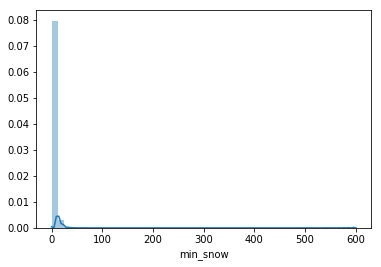

In [59]:
#Examine distribution - is mean or median better for this
sns.distplot(raw_data.loc[raw_data["min_snow"].isnull() == False]["min_snow"]);

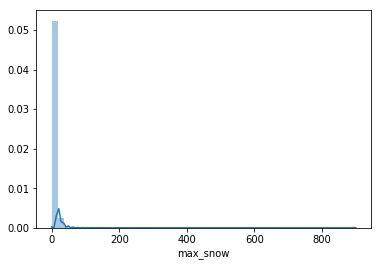

In [60]:
sns.distplot(raw_data.loc[raw_data["max_snow"].isnull() == False]["max_snow"]);

In [61]:
#Contains outliers so we will replace with 0 assuming no snow happened if it wasn't recorded
raw_data["min_snow"] = raw_data["min_snow"].fillna(0)
raw_data["max_snow"] = raw_data["max_snow"].fillna(0)

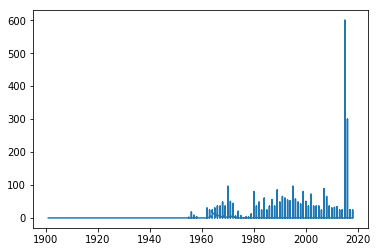

In [62]:
#Graph against time
#seaborn lineplot not integrated into latest version of conda
plt.plot(raw_data["count_year"], raw_data["min_snow"]);

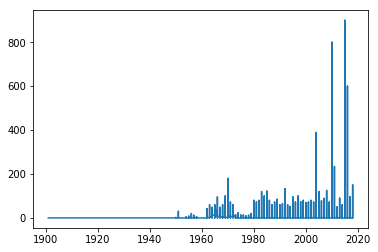

In [63]:
plt.plot(raw_data["count_year"], raw_data["max_snow"]);

In [64]:
raw_data["min_snow"].describe()

count    106925.000000
mean          1.159222
std           4.118032
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         600.000000
Name: min_snow, dtype: float64

In [65]:
#There are clearly some outliers, how many are there? 
len(raw_data[raw_data["min_snow"] > (raw_data["min_snow"].mean() + 3 * raw_data["min_snow"].std())])

1883

In [66]:
len(raw_data[raw_data["max_snow"] > (raw_data["max_snow"].mean() + 3 * raw_data["max_snow"].std())])

1440

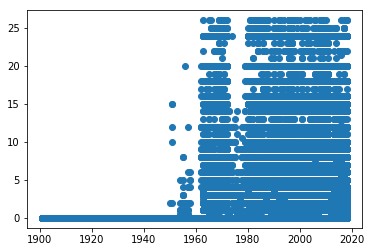

In [67]:
temp = raw_data.loc[raw_data["max_snow"] < (raw_data["max_snow"].mean() + 3 * raw_data["max_snow"].std()), :]
plt.scatter(temp["count_year"], temp["max_snow"]);

In [68]:
#Very little relationship with time

In [69]:
#Create average snow variable
raw_data["average_snow"] = (raw_data["max_snow"] + raw_data["min_snow"]) / 2

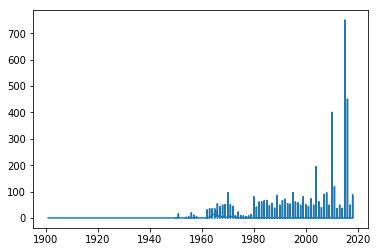

In [70]:
plt.plot(raw_data["count_year"], raw_data["average_snow"])

In [71]:
raw_data[raw_data['average_snow'] > 150]

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,nocturnal_distance_metric,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,min_temp_imperial,max_temp_imperial,min_temp_metric,max_temp_metric,average_snow
72688,Rankin Inlet,CA-NU,62.811923,-92.088074,2004,2003-12-28,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,988.06,389.0,-6.0,-4.0,-21.111111,-20.0,194.5
85888,Mono Lake,US-CA,37.956057,-119.120139,2010,2009-12-20,14.0,1.0,1.0,9.0,...,0.0,0.0,0.0,2032.00,800.0,8.0,41.0,-13.333333,5.0,400.0
97201,Baie-Missisquoi,CA-QC,45.103819,-73.114114,2015,2014-12-14,18.0,3.0,7.0,7.0,...,NaN,600.0,1524.0,2286.00,900.0,7.2,39.6,-28.000000,-10.0,750.0
97238,St-Jean-sur-le-Richelieu,CA-QC,45.309076,-73.242995,2015,2014-12-20,27.0,1.0,7.0,7.0,...,NaN,NaN,NaN,1524.00,600.0,-207.0,-118.8,-147.000000,-98.0,300.0
99690,Hudson,CA-QC,45.389610,-74.131862,2016,2015-12-27,44.0,12.0,44.0,44.0,...,NaN,300.0,762.0,1524.00,600.0,21.6,75.6,-20.000000,10.0,450.0


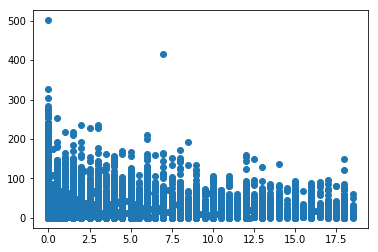

In [72]:
temp = raw_data.loc[raw_data["average_snow"] < (raw_data["average_snow"].mean() + 3 * raw_data["average_snow"].std()), :]
plt.scatter(temp["average_snow"], temp["n_field_counters"]);

### Wind

In [73]:
raw_data["wind_unit"].value_counts()

1.0    49636
3.0     5902
0.0     1488
Name: wind_unit, dtype: int64

In [74]:
raw_data["min_wind"].isnull().sum()

26898

In [75]:
raw_data["max_wind"].isnull().sum()

26816

In [76]:
raw_data["min_wind"].describe()

count    80027.000000
mean         4.383454
std          5.703883
min        -16.000000
25%          0.000000
50%          3.000000
75%          6.000000
max         99.000000
Name: min_wind, dtype: float64

In [77]:
raw_data["max_wind"].describe()

count    80109.000000
mean        12.424563
std         10.146659
min          0.000000
25%          5.000000
50%         10.000000
75%         15.000000
max        500.000000
Name: max_wind, dtype: float64

In [78]:
#How many outliers
def GetBounds(ser):
    lower = ser.mean() - 3 * ser.std()
    upper = ser.mean() + 3 * ser.std()
    return (lower, upper)

In [79]:
bounds = GetBounds(raw_data["min_wind"])
len(raw_data[(raw_data["min_wind"] < bounds[0]) | (raw_data["min_wind"] > bounds[1])])

1128

In [80]:
bounds = GetBounds(raw_data["max_wind"])
len(raw_data[(raw_data["max_wind"] < bounds[0]) | (raw_data["max_wind"] > bounds[1])])

990

In [81]:
raw_data['min_wind'] = raw_data['min_wind'].fillna(0)
raw_data['max_wind'] = raw_data['max_wind'].fillna(0)

In [82]:
raw_data['average_wind'] = (raw_data['min_wind'] + raw_data['max_wind'])/2

In [83]:
raw_data['average_wind'].describe()

count    106925.000000
mean          6.294664
std           7.198332
min           0.000000
25%           0.000000
50%           5.000000
75%          10.000000
max         267.500000
Name: average_wind, dtype: float64

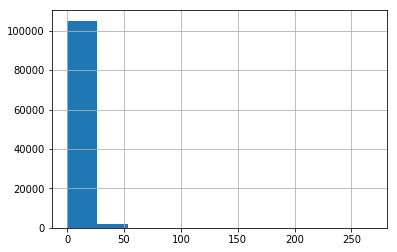

In [84]:
raw_data['average_wind'].hist()

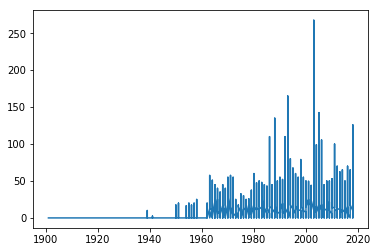

In [85]:
#Oddly similar to average snow
plt.plot(raw_data['count_year'], raw_data['average_wind'])

In [86]:
raw_data[raw_data["average_wind"] > 150]

,circle_name,country_state,lat,lon,count_year,count_date,n_field_counters,n_feeder_counters,min_field_parties,max_field_parties,...,min_snow_imperial,min_snow_metric,max_snow_metric,max_snow_imperial,min_temp_imperial,max_temp_imperial,min_temp_metric,max_temp_metric,average_snow,average_wind
52458,Cape St. Mary's,CA-NL,46.866672,-54.083301,1993,1992-12-19,11.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,111.6,124.2,-1.111111,2.777778,0.0,165.0
72128,Spearfish,US-SD,44.519824,-103.864184,2003,2002-12-29,7.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,50.0,61.0,10.000000,16.111111,0.0,267.5


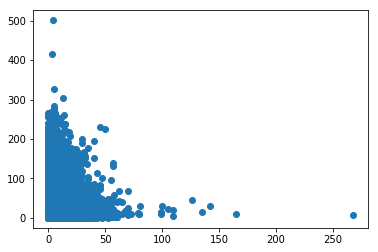

In [87]:
#Relationship with n field counters
plt.scatter(raw_data["average_wind"], raw_data["n_field_counters"]);

### Temperature

In [88]:
raw_data['temp_unit'].value_counts()

2.0    50381
1.0     6645
Name: temp_unit, dtype: int64

In [89]:
# raw_data[raw_data["temp_unit"] != 1.0][["min_temp", "max_temp"]].describe()

# Plotly for interactive plotting

In [90]:
import cufflinks as cf
cf.set_config_file(offline=True)

In [91]:
df_min_snow = df['min_snow_imperial'].to_frame()

In [92]:
type(df_min_snow)

pandas.core.frame.DataFrame

In [93]:
df_min_snow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106925 entries, 0 to 106928
Data columns (total 1 columns):
min_snow_imperial    76936 non-null float64
dtypes: float64(1)
memory usage: 1.6 MB


In [97]:
# df_min_snow.iplot(kind='histogram', title='Snow')

In [95]:
import plotly_express as px

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.tools as tls

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['lon'],
        lat = df['lat'],
        #text = df['text'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            #color = df['cnt'],
            #cmax = df['cnt'].max(),
            colorbar=dict(
                title="Incoming flights<br>February 2011"
            )
        ))]

layout = dict(
        title = 'Most trafficked US airports<br>(Hover for airport names)', 
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5        
        ),
    )

fig = go.Figure(data=data, layout=layout )
py.iplot(fig, filename='d3-airports' )

In [ ]:
df.info()